<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

## Regression

In [3]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

Regresion is easy to deploy on data sets with little manupulation. This could be ideal for mose simiplistic analaysis on a quicker turnover basis.

- Find out how many rows and columns are in `noise`.

In [4]:
noise.shape

(1503, 6)

- Find out what data types are present.

In [5]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

- Find out how many null values there are in each columns.

In [6]:
noise.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [7]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

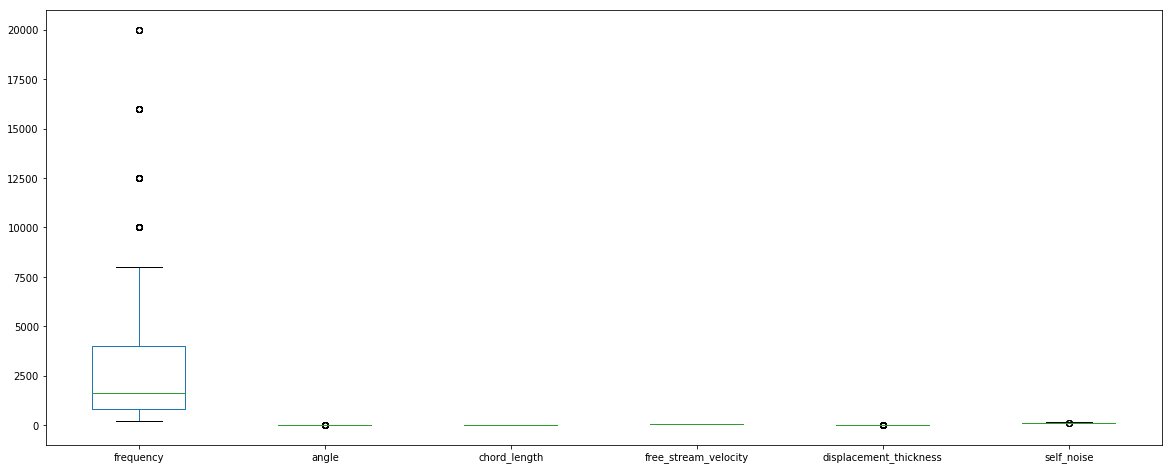

In [8]:
ax = noise.plot(kind='box', figsize=(20,8))

- Which variables are approximately normally distributed?

chord_length, free_stream_velocity

- Which variables show strong skew?

Frequency, angle, displacement_thickness, self_noise

- Make a scatterplot of each feature variable with the target variable "self_noise".

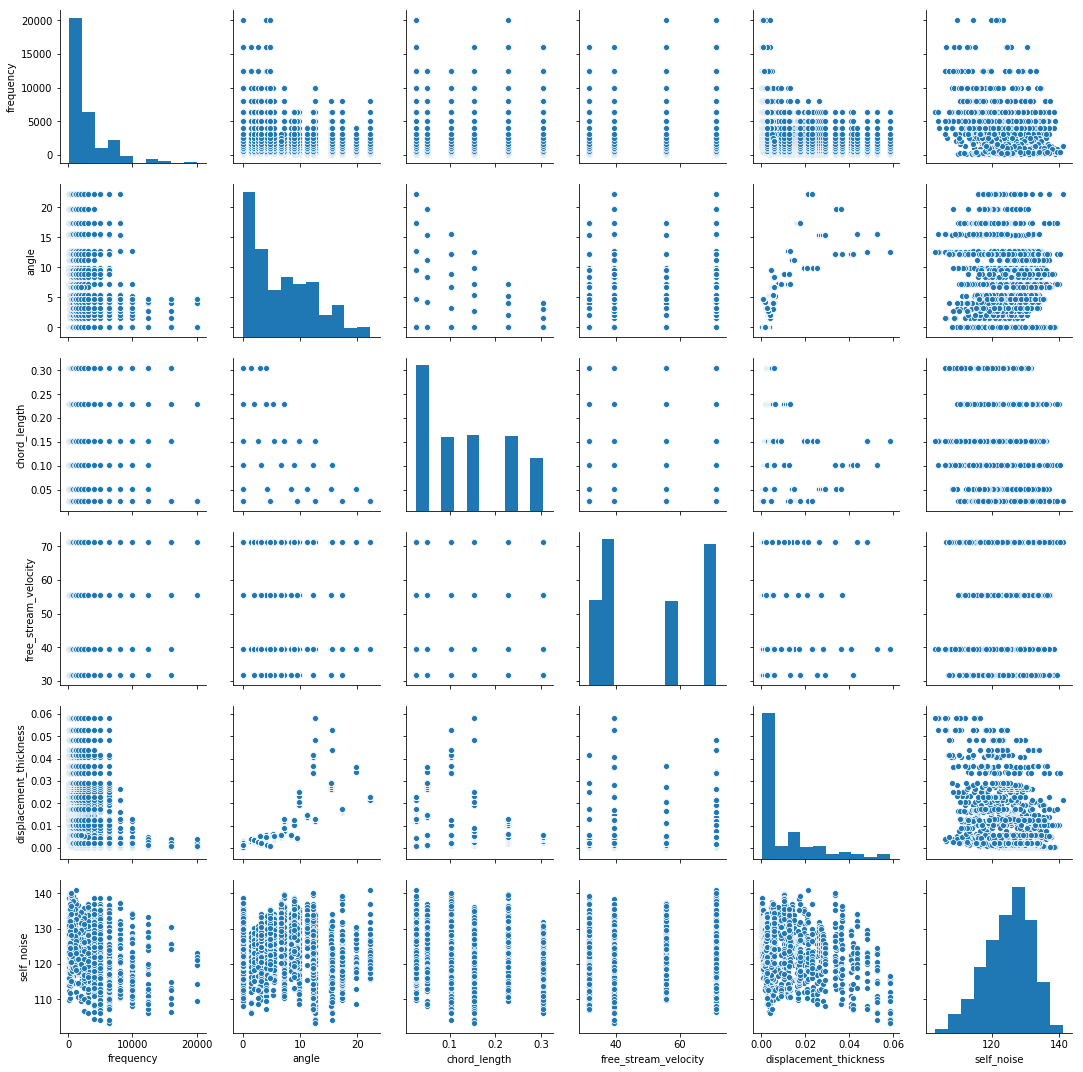

In [9]:
g = sns.pairplot(noise)

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

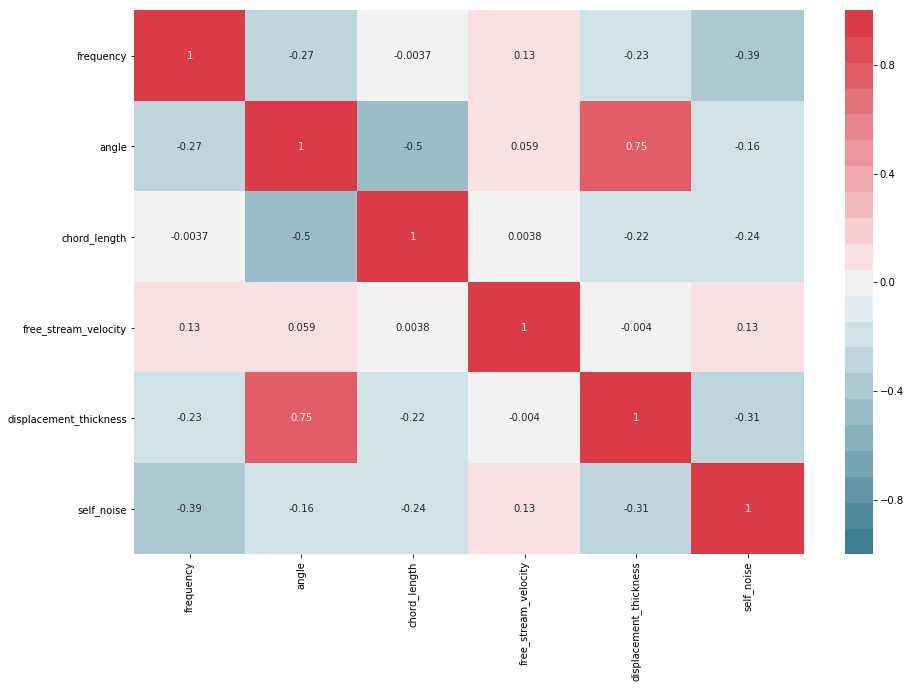

In [10]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(noise.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=21),
            annot=True,
            ax=ax,
           );

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Strong correlations between displacement_thickness and angle

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

target_col = 'self_noise'
X = noise.drop('self_noise', axis='columns')
y = noise.loc[:,target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

lr = LinearRegression()

lr.fit(X_train, y_train)
lr.score(X_test, y_test)

print('This is test score:', lr.score(X_test, y_test))
print('This is train score:', lr.score(X_train, y_train))

This is test score: 0.5215768877144555
This is train score: 0.5128763470529909


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

52% better

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Not much variance, the train and test scores are very similar

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Bias, underminated baseline to compare it against, could be outside factors influencing scores

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [12]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9901242258090049
0.9244670678638407


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

More varaiance between the scores, less bias

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

Randon forest is preformancing better than linear regression, not sure if newer model is needed

- **BONUS:** Keep going! Find ways to make your model better.

## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

In [13]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [14]:
credit.shape

(690, 16)

- Find out what data types are present.

In [15]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [16]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [28]:
credit = credit.replace({2:{'?':0},14:{'?':0}})
credit = credit.astype({2: 'float64',14:'float64'})

- Find out how many null values there are in each columns.

In [29]:
credit.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

- Check basic summary information for each column, including categorical columns.

In [30]:
credit.columns

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16], dtype='int64')

In [32]:
credit.describe(include='all')

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,690,690.000000,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690.000000,690.000000,690
unique,3,NaN,NaN,4,4,15,10,NaN,2,2,NaN,2,3,NaN,NaN,2
top,b,NaN,NaN,u,g,c,v,NaN,t,f,NaN,f,g,NaN,NaN,-
freq,468,NaN,NaN,519,519,137,399,NaN,361,395,NaN,374,625,NaN,NaN,383
mean,NaN,31.019159,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,180.547826,1017.385507,NaN
std,NaN,12.552078,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.970323,5210.102598,NaN
min,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,NaN,22.440000,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,60.000000,0.000000,NaN
50%,NaN,28.170000,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,NaN,37.707500,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,272.000000,395.500000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

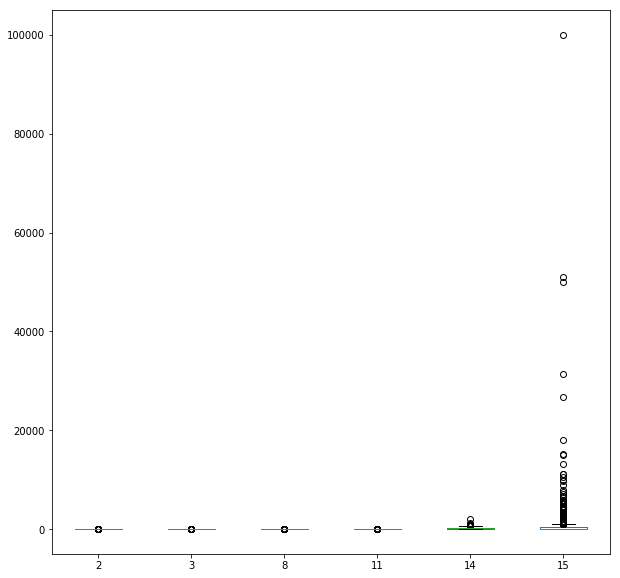

In [34]:
ax = credit.plot(kind='box', figsize = (10,10))

- Which variables are approximately normally distributed?

3, 8, 11

- Which variables show strong skew?

15

- Make a scatterplot of each feature variable with the target variable (`16`).

In [24]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


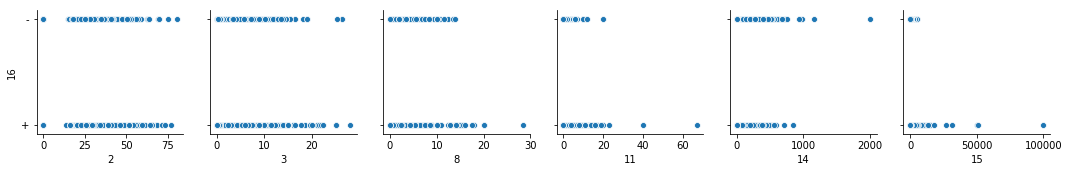

In [36]:
ax = sns.pairplot(credit, x_vars=[2, 3, 8, 11, 14, 15], y_vars=16)

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

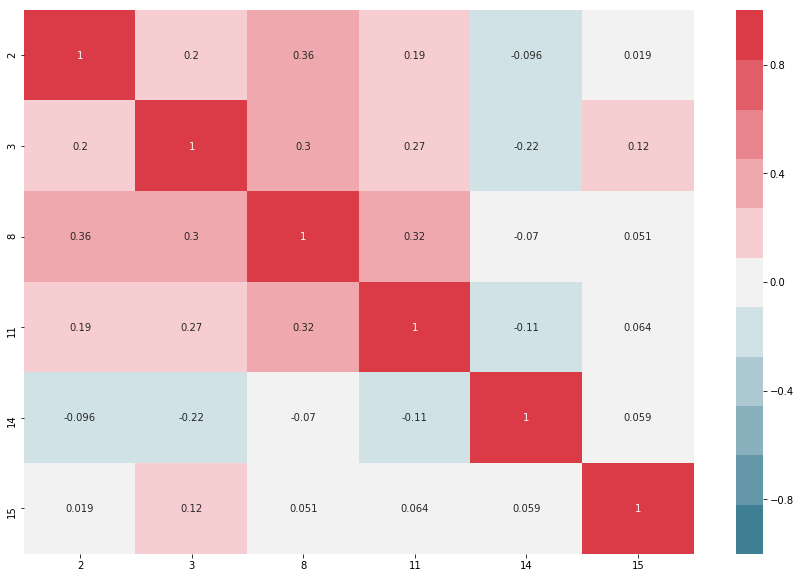

In [37]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(credit.corr(),
            vmin=-1,
            vmax=1,
            cmap=sns.diverging_palette(220, 10, n=11),
            annot=True,
            ax=ax,
           );

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Alot of null-values, and values of different types - some strong correleations with the lower numbers.

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

In [39]:
credit.loc[:, 16].value_counts(normalize=True)

-    0.555072
+    0.444928
Name: 16, dtype: float64

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [43]:
feature_col = [2,3,8,11,14,15]
target_col = 16

X = credit.loc[:, feature_col]
y = credit.loc[:, target_col]

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [45]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/evankatz/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
# /scrub/
print('Training score:', lr.score(X_train, y_train))
print('Testing score:', lr.score(X_test, y_test))

Training score: 0.7620889748549323
Testing score: 0.7861271676300579


In [47]:
y_test.value_counts(normalize=True)

-    0.578035
+    0.421965
Name: 16, dtype: float64

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The training model performed better than compared to the null model, variance is low, but bias is high

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

The test was slighlty better, but not enough to have confidence in the current model

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Variance, model is tending to underfit

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.7861271676300579


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Much better than the linear regresion model, more overfitting

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

Changed the number of estimators, increased score ever so slightly

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=40, oob_score=True)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.7976878612716763


- **BONUS:** Keep going! Find ways to make your model better.